In [1]:
import project_path

In [2]:
from src.data.make_dataset import main
from src.models.horpca import horpca
from src.models.simglemare import simglemare

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [4]:
Y_noisy, Y, params = main('../src/configs/data/default.yaml')

In [5]:
sizes = params.dims
n = len(sizes)

# L, obj_val, terms, lam_val = horpca(
#     Y_noisy
#     )

In [13]:
params.max_iter = 100
params.err_tol = 1e-2
params.verbose = True
params.lamda = [1, [1e-1 for _ in range(n)], [1e-1 for _ in range(n)], [1e-1 for _ in range(n)]]
params.alpha = [1e-2 for _ in range(n)]
params.beta = [[1e-2 for _ in range(n)], [2e-2 for _ in range(n)]]
L, S, obj_val, lam_val = simglemare(Y_noisy, params)

Max Iter


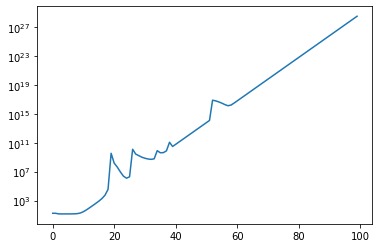

In [11]:
plt.semilogy(lam_val)

In [11]:
print('Normalized error of the output: {:.2f}'.format(norm(Y-Y_noisy)/norm(Y)))
print('Normalized error of the output: {:.2f}'.format(norm(Y-L)/norm(Y)))

Normalized error of the output: 2.20
Normalized error of the output: 0.52


In [8]:
def init_P(sizes):
    '''Initialize P matrices given size.'''
    P = [np.zeros((s, int(s*(s+1)/2))) for s in sizes]
    for i, s in enumerate(sizes):
        P[i][0, 1:s] = 1
        for j in range(1, s):
            P[i][j, 1:j+1] = 1
            P[i][j, int(j*s-j*(j-1)/2+1):int((j+1)*(s-j/2))] = 1
    
    return P

In [10]:
from src.data.generate_graphs import generate_graphs
Phi = generate_graphs([5], 2)

In [11]:
Phi

[matrix([[ 3,  0, -1, -1, -1],
         [ 0,  2,  0, -1, -1],
         [-1,  0,  2,  0, -1],
         [-1, -1,  0,  2,  0],
         [-1, -1, -1,  0,  3]], dtype=int32)]

In [22]:
ind = np.triu_indices(5)
P = Phi[0]
P[[np.arange(5),np.arange(5)]] = 0
p = P[ind].T
p

C:\Users\emres\AppData\Local\Temp/ipykernel_17308/2925809057.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  P[[np.arange(5),np.arange(5)]] = 0


matrix([[ 0],
        [ 0],
        [-1],
        [-1],
        [-1],
        [ 0],
        [ 0],
        [-1],
        [-1],
        [ 0],
        [ 0],
        [-1],
        [ 0],
        [ 0],
        [ 0]], dtype=int32)

In [24]:
P = init_P([5])
P[0]@p

matrix([[-3.],
        [-2.],
        [-2.],
        [-2.],
        [-3.]])